Estadísticas básicas de las fechas:
count                            45376
mean     1992-05-15 17:10:50.564174848
min                1874-12-09 00:00:00
25%                1978-10-06 00:00:00
50%                2001-08-30 00:00:00
75%                2010-12-17 00:00:00
max                2020-12-16 00:00:00
Name: release_date, dtype: object


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7384\2584725962.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=movies_df, x='release_month_es', order=meses_es, palette='viridis')


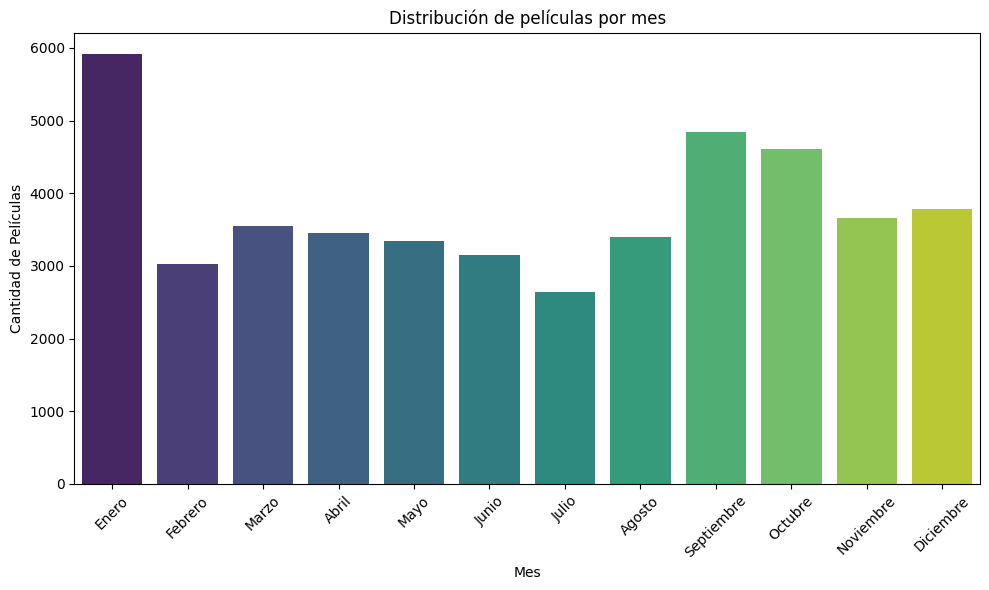

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7384\2584725962.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=movies_df, x='release_day_es', order=dias_es, palette='coolwarm')


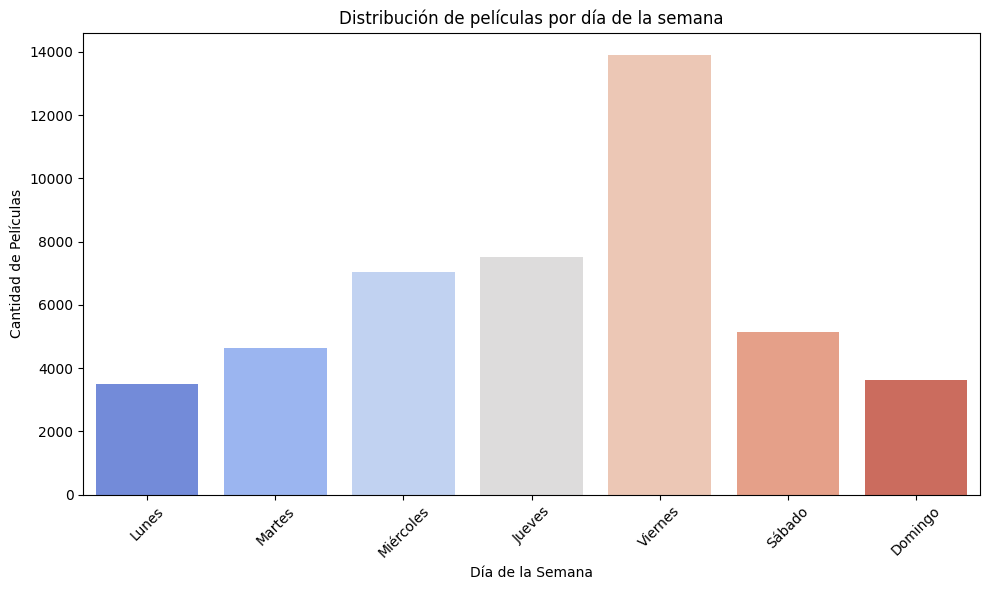

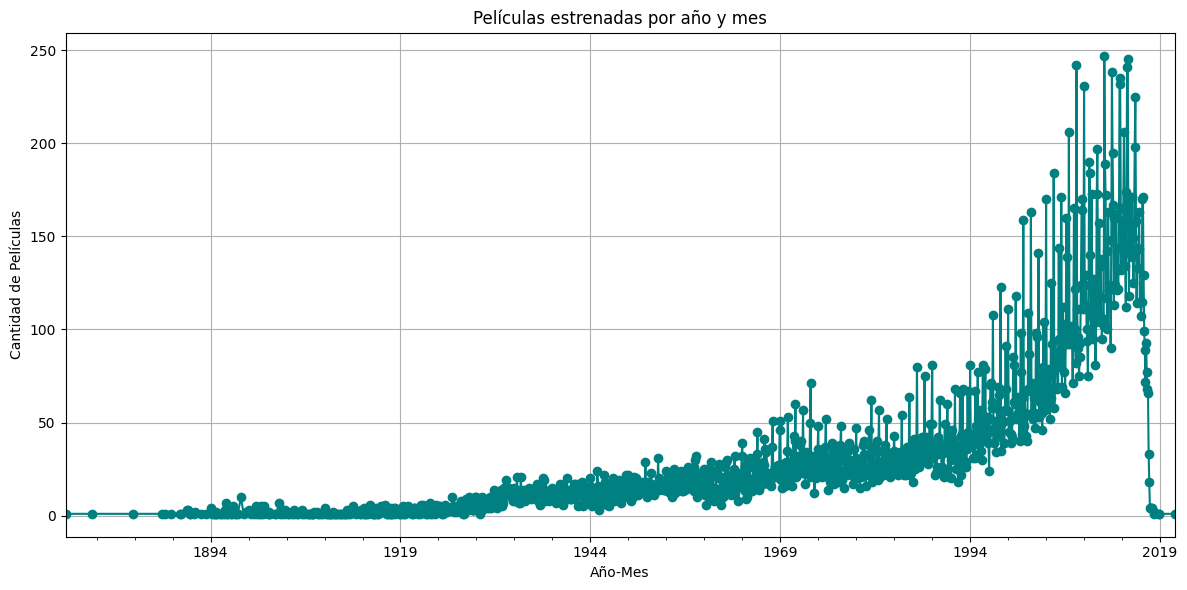

El dataset procesado ha sido guardado en: C:\Users\USUARIO\Desktop\SOYhENRY\sistema de recomendacion\Movies\EDAs\movies_datasetc_EDA.csv


In [2]:
# EDA para funciones: cantidad_filmaciones_mes y cantidad_filmaciones_dia
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo de datos principal
file_path = r"C:\Users\USUARIO\Desktop\SOYhENRY\sistema de recomendacion\Movies\CSV\movies_datasetc.csv"
movies_df = pd.read_csv(file_path)

# Convertir la columna 'release_date' a formato de fecha
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Eliminar filas con fechas no válidas
movies_df = movies_df.dropna(subset=['release_date'])

# Crear nuevas columnas para el análisis
movies_df['release_month'] = movies_df['release_date'].dt.month
movies_df['release_day'] = movies_df['release_date'].dt.dayofweek  # 0: Lunes, 6: Domingo

# Traducción de días y meses al español
dias_es = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
meses_es = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
movies_df['release_month_es'] = movies_df['release_month'].apply(lambda x: meses_es[int(x) - 1] if not pd.isna(x) else x)
movies_df['release_day_es'] = movies_df['release_day'].apply(lambda x: dias_es[int(x)] if not pd.isna(x) else x)

# Estadísticas básicas
print("Estadísticas básicas de las fechas:")
print(movies_df['release_date'].describe())

# Distribución de películas por mes
plt.figure(figsize=(10, 6))
sns.countplot(data=movies_df, x='release_month_es', order=meses_es, palette='viridis')
plt.title('Distribución de películas por mes')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Cantidad de Películas')
plt.tight_layout()
plt.show()

# Distribución de películas por día de la semana
plt.figure(figsize=(10, 6))
sns.countplot(data=movies_df, x='release_day_es', order=dias_es, palette='coolwarm')
plt.title('Distribución de películas por día de la semana')
plt.xticks(rotation=45)
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Películas')
plt.tight_layout()
plt.show()

# Películas estrenadas por año y mes
movies_df['year_month'] = movies_df['release_date'].dt.to_period('M')
peliculas_por_mes = movies_df['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
peliculas_por_mes.plot(kind='line', marker='o', color='teal')
plt.title('Películas estrenadas por año y mes')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Películas')
plt.grid()
plt.tight_layout()
plt.show()

# Guardar el dataset procesado
processed_path = r"C:\Users\USUARIO\Desktop\SOYhENRY\sistema de recomendacion\Movies\EDAs\movies_datasetc_EDA.csv"
movies_df.to_csv(processed_path, index=False)

print(f"El dataset procesado ha sido guardado en: {processed_path}")


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7384\1093677253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=movies_df, x='release_month_es', y='vote_average', order=meses_es, palette='coolwarm')


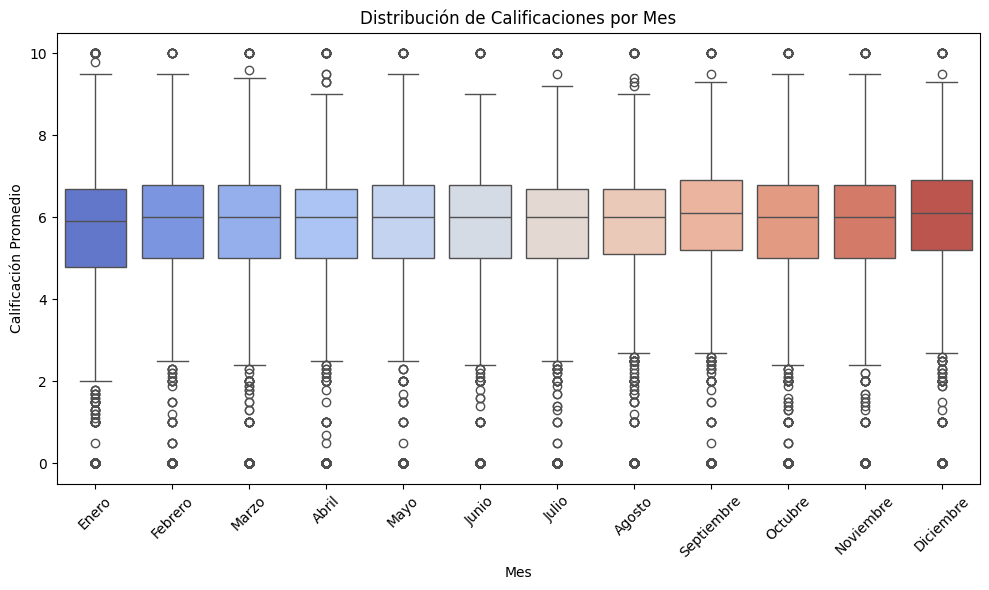

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=movies_df, x='release_month_es', y='vote_average', order=meses_es, palette='coolwarm')
plt.title('Distribución de Calificaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


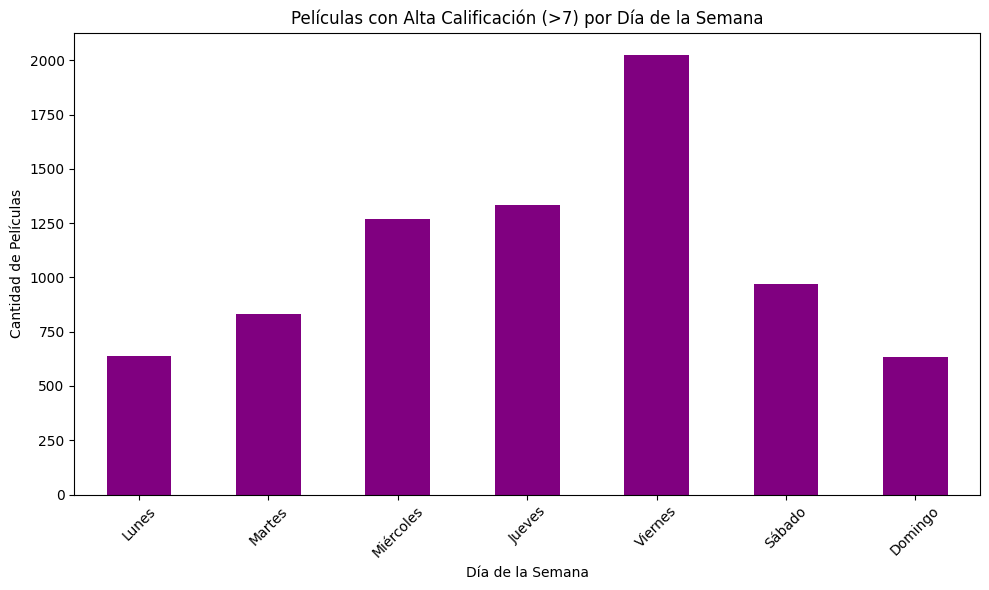

In [7]:
high_score_days = movies_df[movies_df['vote_average'] > 7].groupby('release_day_es').size()

plt.figure(figsize=(10, 6))
high_score_days.reindex(dias_es).plot(kind='bar', color='purple')
plt.title('Películas con Alta Calificación (>7) por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# Convertir columnas relevantes a float (o int si aplica)
movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')


In [9]:
# Filtrar valores nulos en las columnas relevantes
movies_df.dropna(subset=['popularity', 'budget', 'revenue'], inplace=True)


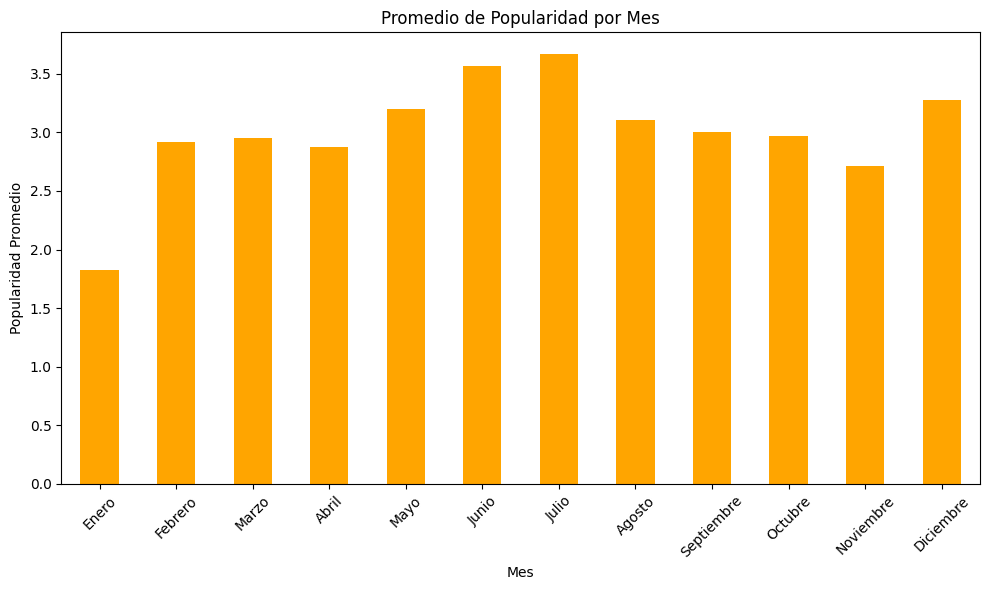

In [10]:
# Agrupación y cálculo de la media
popularity_month_correlation = movies_df.groupby('release_month')['popularity'].mean()

# Gráfico
plt.figure(figsize=(10, 6))
popularity_month_correlation.plot(kind='bar', color='orange')
plt.title('Promedio de Popularidad por Mes')
plt.xlabel('Mes')
plt.ylabel('Popularidad Promedio')
plt.xticks(ticks=range(12), labels=meses_es, rotation=45)
plt.tight_layout()
plt.show()


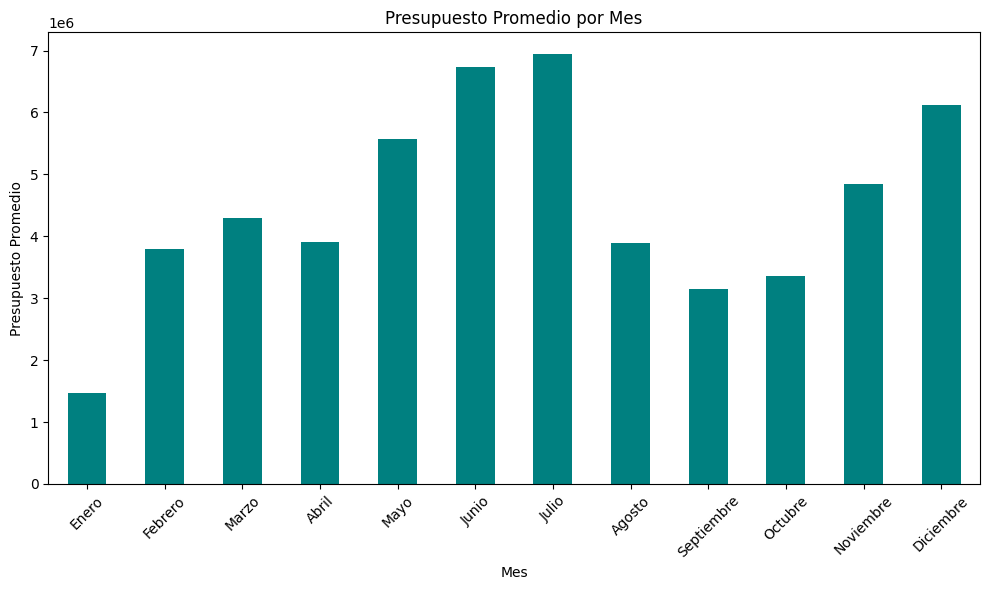

In [11]:
# Agrupación y cálculo de la media
budget_month_correlation = movies_df.groupby('release_month')['budget'].mean()

# Gráfico
plt.figure(figsize=(10, 6))
budget_month_correlation.plot(kind='bar', color='teal')
plt.title('Presupuesto Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Presupuesto Promedio')
plt.xticks(ticks=range(12), labels=meses_es, rotation=45)
plt.tight_layout()
plt.show()


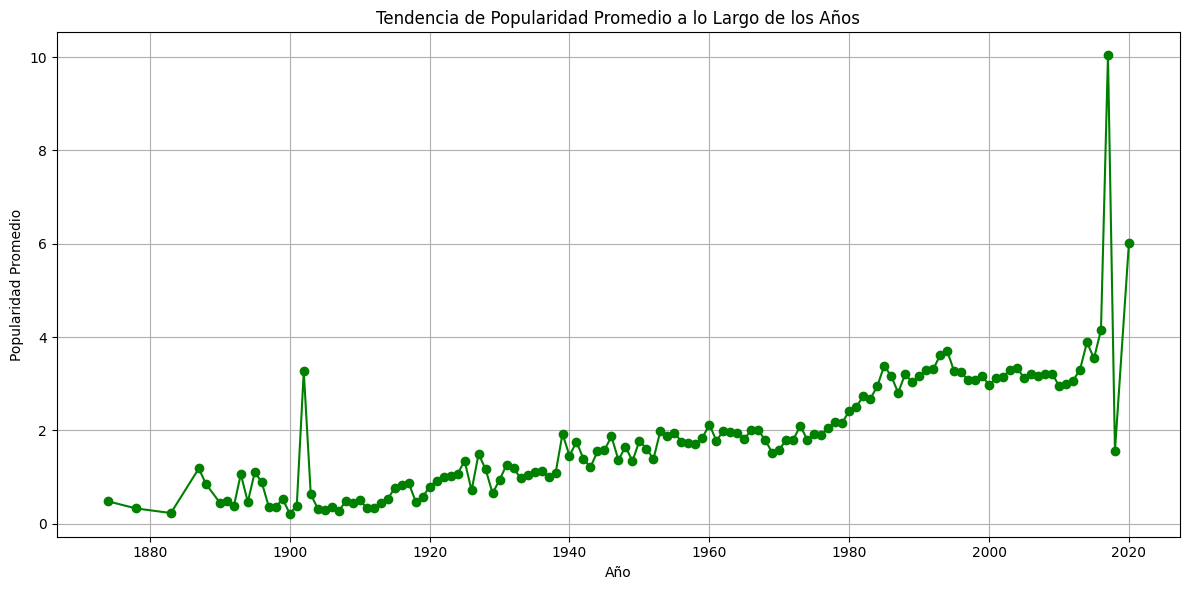

In [12]:
# Convertir release_date a formato datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Agrupación por año y cálculo de la media de popularidad
popularity_trend = movies_df.groupby(movies_df['release_date'].dt.year)['popularity'].mean()

# Gráfico
plt.figure(figsize=(12, 6))
popularity_trend.plot(kind='line', marker='o', color='green')
plt.title('Tendencia de Popularidad Promedio a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Popularidad Promedio')
plt.grid()
plt.tight_layout()
plt.show()


In [13]:
print(movies_df[['popularity', 'budget', 'revenue', 'release_month']].info())
print(movies_df[['popularity', 'budget', 'revenue', 'release_month']].head())


<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   popularity     45376 non-null  float64
 1   budget         45376 non-null  int64  
 2   revenue        45376 non-null  float64
 3   release_month  45376 non-null  int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 1.6 MB
None
   popularity    budget      revenue  release_month
0   21.946943  30000000  373554033.0             10
1   17.015539  65000000  262797249.0             12
2   11.712900         0          0.0             12
3    3.859495  16000000   81452156.0             12
4    8.387519         0   76578911.0              2


In [14]:
# Identificar valores atípicos en budget y revenue
print("Presupuesto - Descripción Estadística:")
print(movies_df['budget'].describe())

print("\nIngresos - Descripción Estadística:")
print(movies_df['revenue'].describe())

# Opcional: filtrar presupuestos/ingresos irrealmente bajos o altos (e.g., revenue = 0)
movies_df = movies_df[movies_df['revenue'] > 0]
movies_df = movies_df[movies_df['budget'] > 0]


Presupuesto - Descripción Estadística:
count    4.537600e+04
mean     4.232604e+06
std      1.743986e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

Ingresos - Descripción Estadística:
count    4.537600e+04
mean     1.123010e+07
std      6.438996e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64


In [15]:
print("Meses únicos en release_month:", movies_df['release_month'].unique())


Meses únicos en release_month: [10 12 11  5  7  8  9  6  4  1  2  3]


Matriz de correlación:
               popularity    budget   revenue  release_month
popularity       1.000000  0.308173  0.440603       0.008925
budget           0.308173  1.000000  0.730271       0.025144
revenue          0.440603  0.730271  1.000000       0.030890
release_month    0.008925  0.025144  0.030890       1.000000


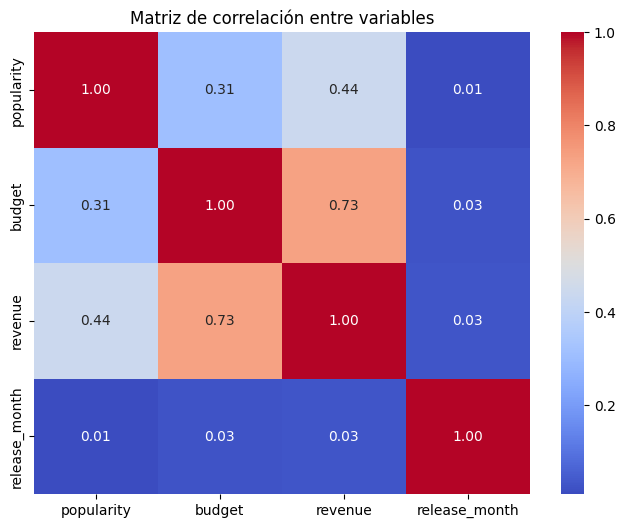

In [16]:
# Matriz de correlación
correlation_matrix = movies_df[['popularity', 'budget', 'revenue', 'release_month']].corr()

print("Matriz de correlación:")
print(correlation_matrix)

# Mapa de calor para visualización
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()


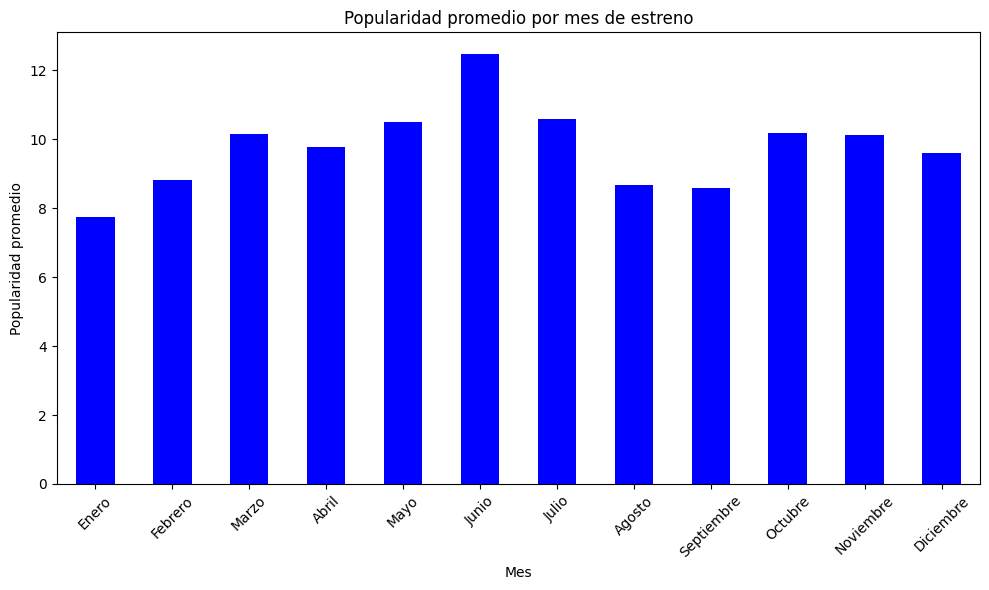

In [17]:
# Agrupación y cálculo de media de popularidad por mes
popularity_by_month = movies_df.groupby('release_month')['popularity'].mean()

# Gráfico
plt.figure(figsize=(10, 6))
popularity_by_month.plot(kind='bar', color='blue')
plt.title('Popularidad promedio por mes de estreno')
plt.xlabel('Mes')
plt.ylabel('Popularidad promedio')
plt.xticks(ticks=range(12), labels=[
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.tight_layout()
plt.show()


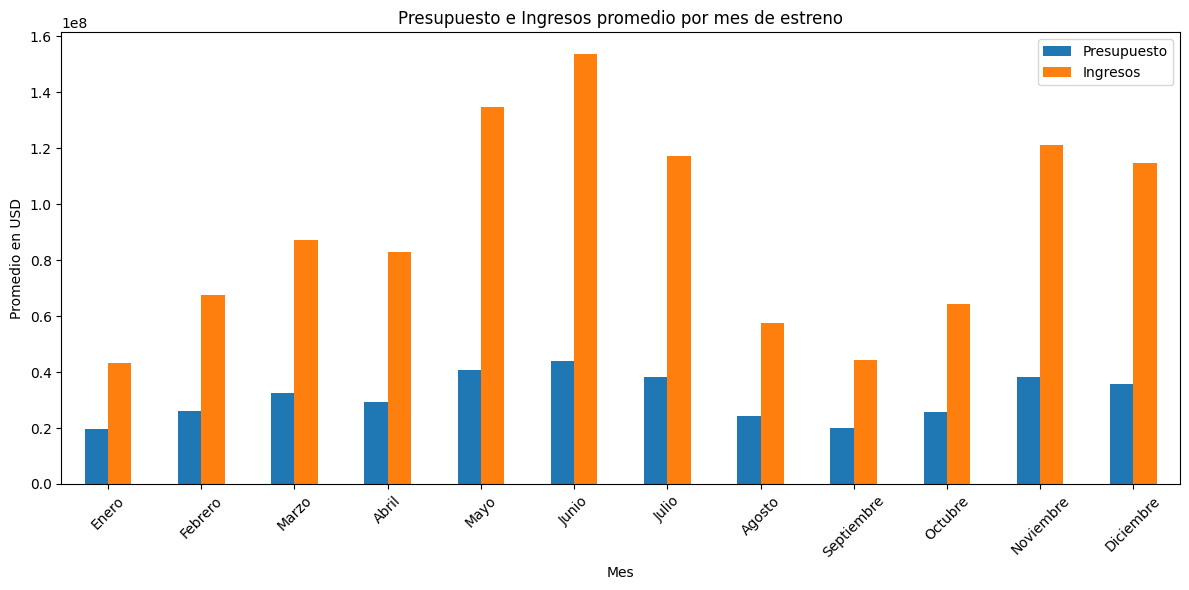

In [18]:
# Agrupación y cálculo de presupuesto e ingresos promedio por mes
budget_revenue_by_month = movies_df.groupby('release_month')[['budget', 'revenue']].mean()

# Gráfico
budget_revenue_by_month.plot(kind='bar', figsize=(12, 6))
plt.title('Presupuesto e Ingresos promedio por mes de estreno')
plt.xlabel('Mes')
plt.ylabel('Promedio en USD')
plt.xticks(ticks=range(12), labels=[
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.legend(['Presupuesto', 'Ingresos'])
plt.tight_layout()
plt.show()
